In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import glob
import sys

sys.path.append("../")
from utils_new import gen_bursts, run_search, analyse_and_plot, fit_and_plot
from utils import *
from plotting import set_size

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# FRB121102 with some nominal parameters
bursts_norm, name = gen_bursts(
    mu_params=[1650, 250],  # sigma_params=[450, 200],
    sigma_params=[300, 250],
    mu_dist="norm",
    sigma_dist="norm",
    N=10000,
    alpha=-1.5,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

bursts_unif, name = gen_bursts(
    mu_params=[800, 2200],
    sigma_params=[50, 500],
    mu_dist="uniform",
    sigma_dist="uniform",
    N=10000,
    alpha=-1.5,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

# bursts, name = gen_bursts(mu_params=[900, 1800],
#                           sigma_params=[50, 200],
#                           mu_dist='uniform', sigma_dist='uniform',
#                           N=10000, alpha=-1.8,
#                           E_min_log=36.5, E_max_log=39.5, save=False)

<IPython.core.display.Javascript object>

In [3]:
# very sensitive (> FAST)
# moderate ( ~GBT)
# less (Parkes, etc)
thresholds = [0.02, 0.02 * 5]  # , 0.02*10*2]
c = ["red", "blue", "green"]

<IPython.core.display.Javascript object>

0.02
8830 2343
10000 2990
0.1
8830 549
10000 424


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


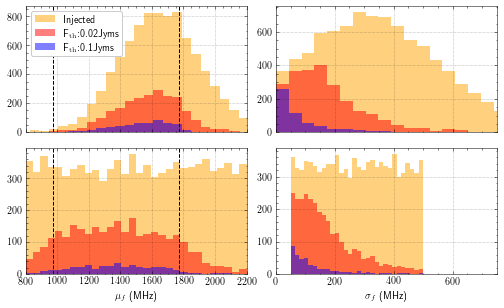

<IPython.core.display.Javascript object>

In [4]:
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        2,
        2,
        figsize=set_size(width="full", subplots=(2, 2)),
        sharey=False,
        sharex="col",
    )
    for i, th in enumerate(thresholds):
        #     ax = axes[i]
        print(th)
        detected_norm, detected_in_band_df, Es = run_search(
            bursts_norm,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts_norm), len(detected_norm))

        density = False
        injected_color = "orange"
        nbins_mu = 30

        if i == 0:
            v, bins_mu_f_norm, _ = axes[0, 0].hist(
                bursts_norm["in_mu_f"],
                alpha=0.5,
                density=density,
                label="Injected",
                color=injected_color,
                bins=nbins_mu,
            )
        axes[0, 0].hist(
            detected_norm["in_mu_f"],
            alpha=0.5,
            density=density,
            label=r"F$_{\mathrm{th}}$:" + str(th) + "Jyms",
            bins=bins_mu_f_norm,
            color=c[i],
        )

        if i == 0:
            v, bins_sigma_f_norm, _ = axes[0, 1].hist(
                bursts_norm["in_sig_f"],
                alpha=0.5,
                density=density,
                bins=30,
                label="Injected",
                color=injected_color,
            )

        axes[0, 1].hist(
            detected_norm["in_sig_f"],
            alpha=0.5,
            density=density,
            label=f"Detected (th: {th}Jyms)",
            bins=bins_sigma_f_norm,
            color=c[i],
        )

        # Now for uniform input
        detected_unif, detected_in_band_df, Es = run_search(
            bursts_unif,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts_unif), len(detected_unif))

        if i == 0:
            v, bins_mu_f_unif, _ = axes[1, 0].hist(
                bursts_unif["in_mu_f"],
                alpha=0.5,
                density=density,
                label="in",
                color=injected_color,
                bins=nbins_mu,
            )
        axes[1, 0].hist(
            detected_unif["in_mu_f"],
            alpha=0.5,
            density=density,
            label="detected",
            bins=bins_mu_f_unif,
            color=c[i],
        )

        if i == 0:
            v, bins_sigma_f_unif, _ = axes[1, 1].hist(
                bursts_unif["in_sig_f"],
                alpha=0.5,
                density=density,
                bins=30,
                label="in",
                color=injected_color,
            )

        axes[1, 1].hist(
            detected_unif["in_sig_f"],
            alpha=0.5,
            density=density,
            label="detected",
            bins=bins_sigma_f_unif,
            color=c[i],
        )

    axes[0, 0].set_xlim([800, 2200])
    axes[1, 0].set_xlim([800, 2200])

    axes[0, 1].set_xlim([0, 750])
    axes[1, 1].set_xlim([0, 750])

    axes[0, 0].axvline(x=974, linestyle="--", c="k")
    axes[0, 0].axvline(x=1774, linestyle="--", c="k")
    axes[1, 0].axvline(x=974, linestyle="--", c="k")
    axes[1, 0].axvline(x=1774, linestyle="--", c="k")

    axes[0, 0].legend()
    axes[1, 0].set_xlabel(r"$\mu_f$ (MHz)")
    axes[1, 1].set_xlabel(r"$\sigma_f$ (MHz)")
    plt.tight_layout()
    plt.savefig("spectra_param_pdf.pdf", bbox_inches="tight", dpi=300)